# 01 - Data Profiling: Fraud Detection Analysis

**Objective:** Understand fraud distribution and risks in credit card transactions

**Key Questions:**
- What is the class imbalance ratio?
- What is the fraud rate?
- Are there potential data leakage features?
- What are the characteristics of fraudulent vs legitimate transactions?

---

## 1. Setup and Imports

In [2]:
import sys
import os

# Add src to path for imports
sys.path.append(os.path.abspath('../src'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Import our data loading module
from data.load_data import load_raw_data, get_data_info, print_data_summary

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("✓ Imports successful")

✓ Imports successful


## 2. Load Data

In [3]:
# Load the dataset
df = load_raw_data()

# Display basic info
print_data_summary(df)

Loading data from: c:\Users\RONO\Documents\GitHub\end-to-end-fraud_detection_system\data\raw\creditcard.csv
Data loaded successfully!
Shape: (284807, 31)
Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

DATASET SUMMARY
Total Transactions: 284,807
Total Features: 30
Fraudulent Transactions: 492 (0.17%)
Legitimate Transactions: 284,315
Missing Values: 0
Duplicate Rows: 1081



In [4]:
# First look at the data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.62,0
1,0.0,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.69,0
2,1.0,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,0.6245,0.0661,0.7173,-0.1659,2.3459,-2.8901,1.1100,-0.1214,-2.2619,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.66,0
3,1.0,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,-0.2265,0.1782,0.5078,-0.2879,-0.6314,-1.0596,-0.6841,1.9658,-1.2326,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.50,0
4,2.0,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,-0.8228,0.5382,1.3459,-1.1197,0.1751,-0.4514,-0.2370,-0.0382,0.8035,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.99,0


In [5]:
# Data types and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## 3. Class Imbalance Analysis

Understanding the severity of class imbalance is critical for fraud detection.

In [6]:
# Calculate class distribution
class_counts = df['Class'].value_counts()
class_percentages = df['Class'].value_counts(normalize=True) * 100

print("Class Distribution:")
print("="*50)
print(f"Legitimate (0): {class_counts[0]:,} ({class_percentages[0]:.4f}%)")
print(f"Fraud (1):      {class_counts[1]:,} ({class_percentages[1]:.4f}%)")
print(f"\nImbalance Ratio: 1:{class_counts[0]/class_counts[1]:.2f}")
print(f"Fraud Rate: {class_percentages[1]:.4f}%")

Class Distribution:
Legitimate (0): 284,315 (99.8273%)
Fraud (1):      492 (0.1727%)

Imbalance Ratio: 1:577.88
Fraud Rate: 0.1727%


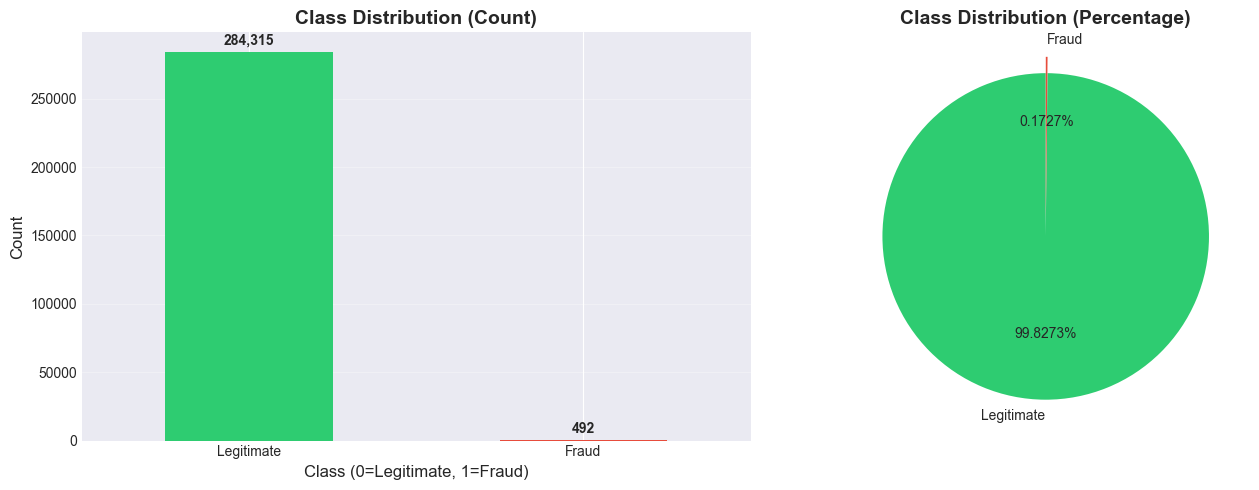


⚠️  SEVERE CLASS IMBALANCE DETECTED
This will require special handling (SMOTE, class weights, etc.)


In [7]:
# Visualize class imbalance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
class_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class (0=Legitimate, 1=Fraud)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['Legitimate', 'Fraud'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, v in enumerate(class_counts):
    axes[0].text(i, v + 5000, f'{v:,}', ha='center', fontweight='bold')

# Pie chart
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(class_counts, labels=['Legitimate', 'Fraud'], autopct='%1.4f%%',
            startangle=90, colors=colors, explode=(0, 0.1))
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n⚠️  SEVERE CLASS IMBALANCE DETECTED")
print(f"This will require special handling (SMOTE, class weights, etc.)")

## 4. Fraud Rate Analysis

In [8]:
# Calculate fraud statistics
total_transactions = len(df)
fraud_transactions = df['Class'].sum()
fraud_rate = (fraud_transactions / total_transactions) * 100

print("Fraud Rate Analysis:")
print("="*50)
print(f"Total Transactions: {total_transactions:,}")
print(f"Fraudulent Transactions: {fraud_transactions:,}")
print(f"Fraud Rate: {fraud_rate:.4f}%")
print(f"\nThis means approximately {int(1/fraud_rate*100)} out of every 10,000 transactions is fraudulent")
print(f"\n💡 Business Impact:")
print(f"   - Accuracy is NOT a good metric (99.8% by predicting all legitimate)")
print(f"   - Need to focus on Precision, Recall, F1-Score, and AUC-ROC")
print(f"   - False Negatives (missed fraud) are costly!")

Fraud Rate Analysis:
Total Transactions: 284,807
Fraudulent Transactions: 492
Fraud Rate: 0.1727%

This means approximately 578 out of every 10,000 transactions is fraudulent

💡 Business Impact:
   - Accuracy is NOT a good metric (99.8% by predicting all legitimate)
   - Need to focus on Precision, Recall, F1-Score, and AUC-ROC
   - False Negatives (missed fraud) are costly!


## 5. Feature Analysis

Examine the features to understand their distributions and identify potential leakage.

In [9]:
# Basic statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0000,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,284807.0000,284807.0000
mean,94813.8596,1.1752e-15,3.3850e-16,-1.3795e-15,2.0949e-15,1.0219e-15,1.4945e-15,-5.6203e-16,1.1496e-16,-2.4142e-15,2.2386e-15,1.7244e-15,-1.2454e-15,8.2389e-16,1.2135e-15,4.8667e-15,1.4362e-15,-3.7682e-16,9.7079e-16,1.0362e-15,6.4187e-16,1.6286e-16,-3.5766e-16,2.6186e-16,4.4739e-15,5.1094e-16,1.6861e-15,-3.6614e-16,-1.2275e-16,88.3496,0.0017
std,47488.1460,1.9587e+00,1.6513e+00,1.5163e+00,1.4159e+00,1.3802e+00,1.3323e+00,1.2371e+00,1.1944e+00,1.0986e+00,1.0888e+00,1.0207e+00,9.9920e-01,9.9527e-01,9.5860e-01,9.1532e-01,8.7625e-01,8.4934e-01,8.3818e-01,8.1404e-01,7.7093e-01,7.3452e-01,7.2570e-01,6.2446e-01,6.0565e-01,5.2128e-01,4.8223e-01,4.0363e-01,3.3008e-01,250.1201,0.0415
min,0.0000,-5.6408e+01,-7.2716e+01,-4.8326e+01,-5.6832e+00,-1.1374e+02,-2.6161e+01,-4.3557e+01,-7.3217e+01,-1.3434e+01,-2.4588e+01,-4.7975e+00,-1.8684e+01,-5.7919e+00,-1.9214e+01,-4.4989e+00,-1.4130e+01,-2.5163e+01,-9.4987e+00,-7.2135e+00,-5.4498e+01,-3.4830e+01,-1.0933e+01,-4.4808e+01,-2.8366e+00,-1.0295e+01,-2.6046e+00,-2.2566e+01,-1.5430e+01,0.0000,0.0000
25%,54201.5000,-9.2037e-01,-5.9855e-01,-8.9036e-01,-8.4864e-01,-6.9160e-01,-7.6830e-01,-5.5408e-01,-2.0863e-01,-6.4310e-01,-5.3543e-01,-7.6249e-01,-4.0557e-01,-6.4854e-01,-4.2557e-01,-5.8288e-01,-4.6804e-01,-4.8375e-01,-4.9885e-01,-4.5630e-01,-2.1172e-01,-2.2839e-01,-5.4235e-01,-1.6185e-01,-3.5459e-01,-3.1715e-01,-3.2698e-01,-7.0840e-02,-5.2960e-02,5.6000,0.0000
50%,84692.0000,1.8109e-02,6.5486e-02,1.7985e-01,-1.9847e-02,-5.4336e-02,-2.7419e-01,4.0103e-02,2.2358e-02,-5.1429e-02,-9.2917e-02,-3.2757e-02,1.4003e-01,-1.3568e-02,5.0601e-02,4.8072e-02,6.6413e-02,-6.5676e-02,-3.6363e-03,3.7348e-03,-6.2481e-02,-2.9450e-02,6.7819e-03,-1.1193e-02,4.0976e-02,1.6594e-02,-5.2139e-02,1.3421e-03,1.1244e-02,22.0000,0.0000
75%,139320.5000,1.3156e+00,8.0372e-01,1.0272e+00,7.4334e-01,6.1193e-01,3.9856e-01,5.7044e-01,3.2735e-01,5.9714e-01,4.5392e-01,7.3959e-01,6.1824e-01,6.6250e-01,4.9315e-01,6.4882e-01,5.2330e-01,3.9967e-01,5.0081e-01,4.5895e-01,1.3304e-01,1.8638e-01,5.2855e-01,1.4764e-01,4.3953e-01,3.5072e-01,2.4095e-01,9.1045e-02,7.8280e-02,77.1650,0.0000
max,172792.0000,2.4549e+00,2.2058e+01,9.3826e+00,1.6875e+01,3.4802e+01,7.3302e+01,1.2059e+02,2.0007e+01,1.5595e+01,2.3745e+01,1.2019e+01,7.8484e+00,7.1269e+00,1.0527e+01,8.8777e+00,1.7315e+01,9.2535e+00,5.0411e+00,5.5920e+00,3.9421e+01,2.7203e+01,1.0503e+01,2.2528e+01,4.5845e+00,7.5196e+00,3.5173e+00,3.1612e+01,3.3848e+01,25691.1600,1.0000


In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print("="*50)
if missing_values.sum() == 0:
    print("✓ No missing values detected!")
else:
    print(missing_values[missing_values > 0])

Missing Values:
✓ No missing values detected!


In [11]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate Rows: {duplicates}")
if duplicates > 0:
    print(f"⚠️  Warning: {duplicates} duplicate rows found")
else:
    print("✓ No duplicate rows")

Duplicate Rows: 1081
⚠️  Warning: 1081 duplicate rows found


### 5.1 Time Feature Analysis

In [12]:
# Analyze Time feature
print("Time Feature Statistics:")
print("="*50)
print(f"Min Time: {df['Time'].min()}")
print(f"Max Time: {df['Time'].max()}")
print(f"Time Range: {df['Time'].max() - df['Time'].min()} seconds")
print(f"Time Range: {(df['Time'].max() - df['Time'].min()) / 3600:.2f} hours")
print(f"Time Range: {(df['Time'].max() - df['Time'].min()) / 86400:.2f} days")

Time Feature Statistics:
Min Time: 0.0
Max Time: 172792.0
Time Range: 172792.0 seconds
Time Range: 48.00 hours
Time Range: 2.00 days


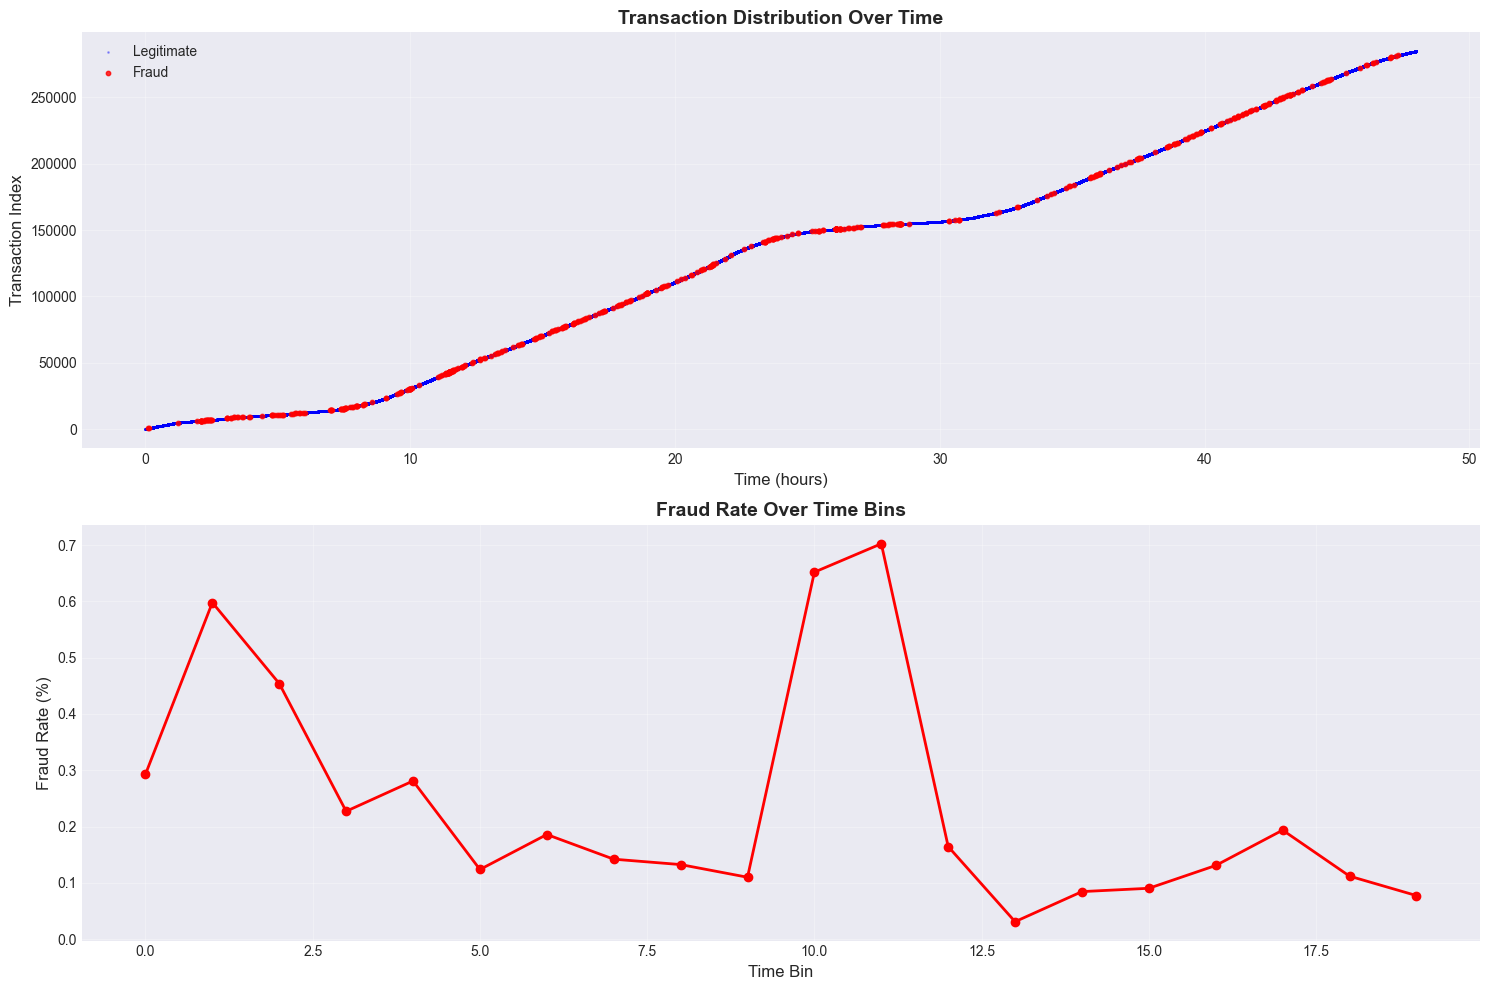


💡 Insight: Check if fraud rate varies significantly over time


In [13]:
# Fraud distribution over time
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Convert time to hours for better visualization
df['Time_Hours'] = df['Time'] / 3600

# Plot 1: All transactions over time
axes[0].scatter(df[df['Class']==0]['Time_Hours'], 
                df[df['Class']==0].index, 
                alpha=0.3, s=1, label='Legitimate', color='blue')
axes[0].scatter(df[df['Class']==1]['Time_Hours'], 
                df[df['Class']==1].index, 
                alpha=0.8, s=10, label='Fraud', color='red')
axes[0].set_xlabel('Time (hours)', fontsize=12)
axes[0].set_ylabel('Transaction Index', fontsize=12)
axes[0].set_title('Transaction Distribution Over Time', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot 2: Fraud rate over time bins
time_bins = pd.cut(df['Time_Hours'], bins=20)
fraud_rate_by_time = df.groupby(time_bins)['Class'].agg(['sum', 'count'])
fraud_rate_by_time['fraud_rate'] = (fraud_rate_by_time['sum'] / fraud_rate_by_time['count']) * 100

axes[1].plot(range(len(fraud_rate_by_time)), fraud_rate_by_time['fraud_rate'], 
             marker='o', linewidth=2, markersize=6, color='red')
axes[1].set_xlabel('Time Bin', fontsize=12)
axes[1].set_ylabel('Fraud Rate (%)', fontsize=12)
axes[1].set_title('Fraud Rate Over Time Bins', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Insight: Check if fraud rate varies significantly over time")

### 5.2 Amount Feature Analysis

In [14]:
# Amount statistics by class
print("Amount Statistics by Class:")
print("="*50)
print("\nLegitimate Transactions:")
print(df[df['Class']==0]['Amount'].describe())
print("\nFraudulent Transactions:")
print(df[df['Class']==1]['Amount'].describe())

Amount Statistics by Class:

Legitimate Transactions:
count    284315.0000
mean         88.2910
std         250.1051
min           0.0000
25%           5.6500
50%          22.0000
75%          77.0500
max       25691.1600
Name: Amount, dtype: float64

Fraudulent Transactions:
count     492.0000
mean      122.2113
std       256.6833
min         0.0000
25%         1.0000
50%         9.2500
75%       105.8900
max      2125.8700
Name: Amount, dtype: float64


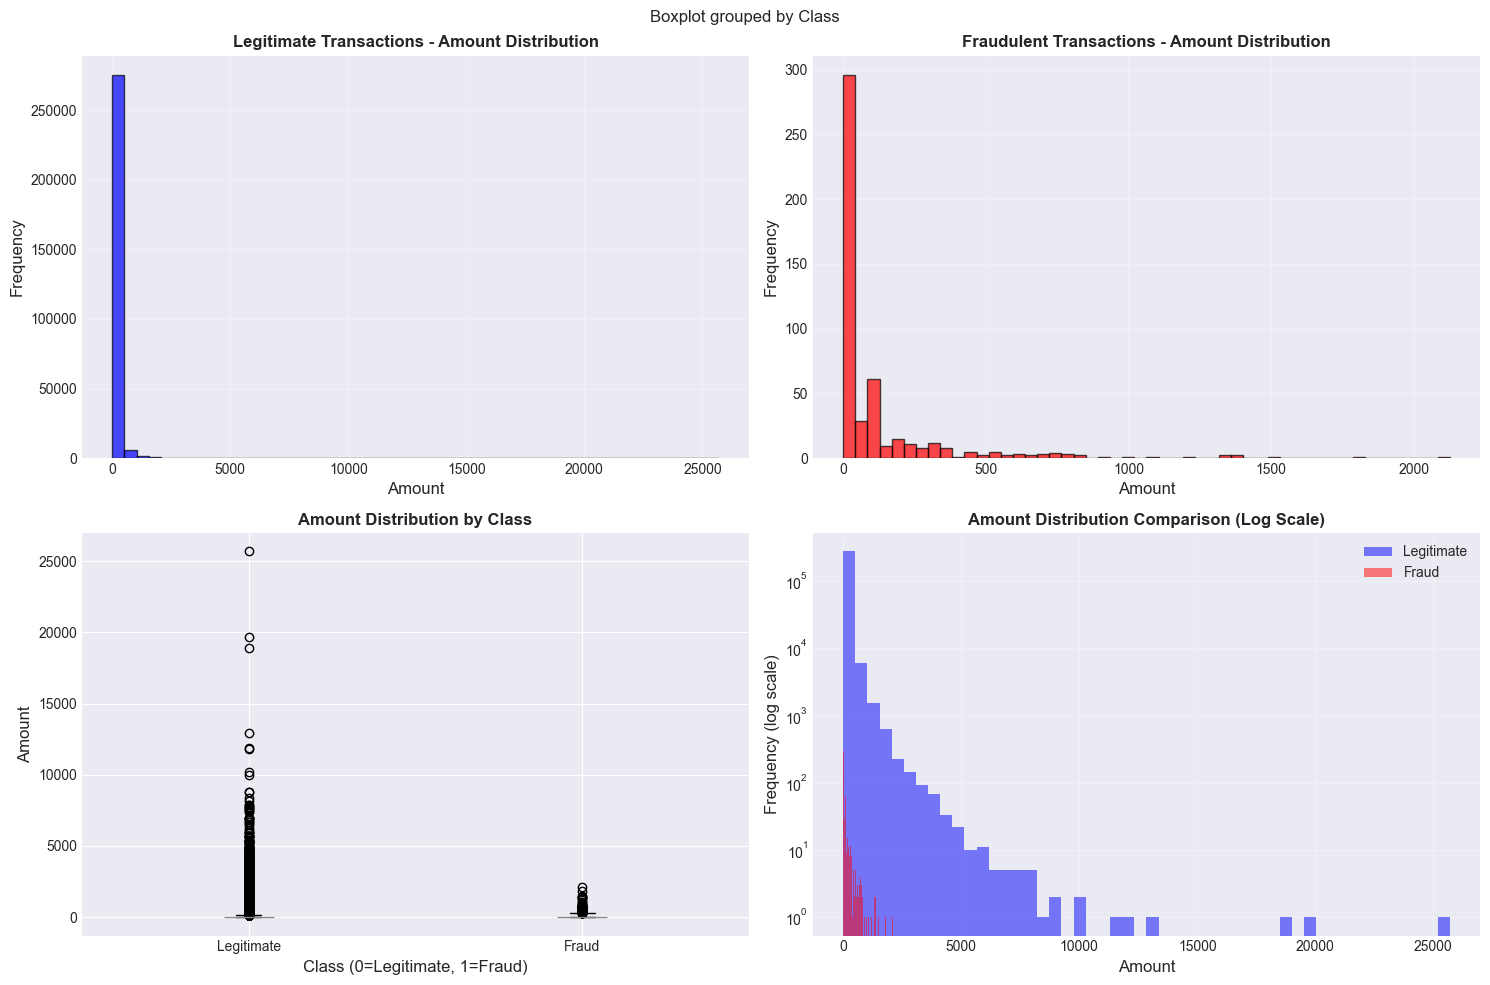

In [15]:
# Visualize Amount distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Amount distribution for legitimate
axes[0, 0].hist(df[df['Class']==0]['Amount'], bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Amount', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Legitimate Transactions - Amount Distribution', fontsize=12, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# Plot 2: Amount distribution for fraud
axes[0, 1].hist(df[df['Class']==1]['Amount'], bins=50, color='red', alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Amount', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('Fraudulent Transactions - Amount Distribution', fontsize=12, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Plot 3: Box plot comparison
df.boxplot(column='Amount', by='Class', ax=axes[1, 0])
axes[1, 0].set_xlabel('Class (0=Legitimate, 1=Fraud)', fontsize=12)
axes[1, 0].set_ylabel('Amount', fontsize=12)
axes[1, 0].set_title('Amount Distribution by Class', fontsize=12, fontweight='bold')
plt.sca(axes[1, 0])
plt.xticks([1, 2], ['Legitimate', 'Fraud'])

# Plot 4: Log-scale comparison
axes[1, 1].hist(df[df['Class']==0]['Amount'], bins=50, alpha=0.5, label='Legitimate', color='blue')
axes[1, 1].hist(df[df['Class']==1]['Amount'], bins=50, alpha=0.5, label='Fraud', color='red')
axes[1, 1].set_xlabel('Amount', fontsize=12)
axes[1, 1].set_ylabel('Frequency (log scale)', fontsize=12)
axes[1, 1].set_yscale('log')
axes[1, 1].set_title('Amount Distribution Comparison (Log Scale)', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 5.3 PCA Features (V1-V28) Analysis

In [16]:
# Get V features
v_features = [col for col in df.columns if col.startswith('V')]
print(f"Number of PCA features: {len(v_features)}")
print(f"Features: {v_features[:5]}... (showing first 5)")

Number of PCA features: 28
Features: ['V1', 'V2', 'V3', 'V4', 'V5']... (showing first 5)


In [17]:
# Calculate correlation with target for each V feature
correlations = df[v_features + ['Class']].corr()['Class'].drop('Class').sort_values(ascending=False)

print("Top 10 Features Most Correlated with Fraud:")
print("="*50)
print(correlations.head(10))
print("\nTop 10 Features Most Negatively Correlated with Fraud:")
print("="*50)
print(correlations.tail(10))

Top 10 Features Most Correlated with Fraud:
V11    0.1549
V4     0.1334
V2     0.0913
V21    0.0404
V19    0.0348
V20    0.0201
V8     0.0199
V27    0.0176
V28    0.0095
V26    0.0045
Name: Class, dtype: float64

Top 10 Features Most Negatively Correlated with Fraud:
V9    -0.0977
V1    -0.1013
V18   -0.1115
V7    -0.1873
V3    -0.1930
V16   -0.1965
V10   -0.2169
V12   -0.2606
V14   -0.3025
V17   -0.3265
Name: Class, dtype: float64


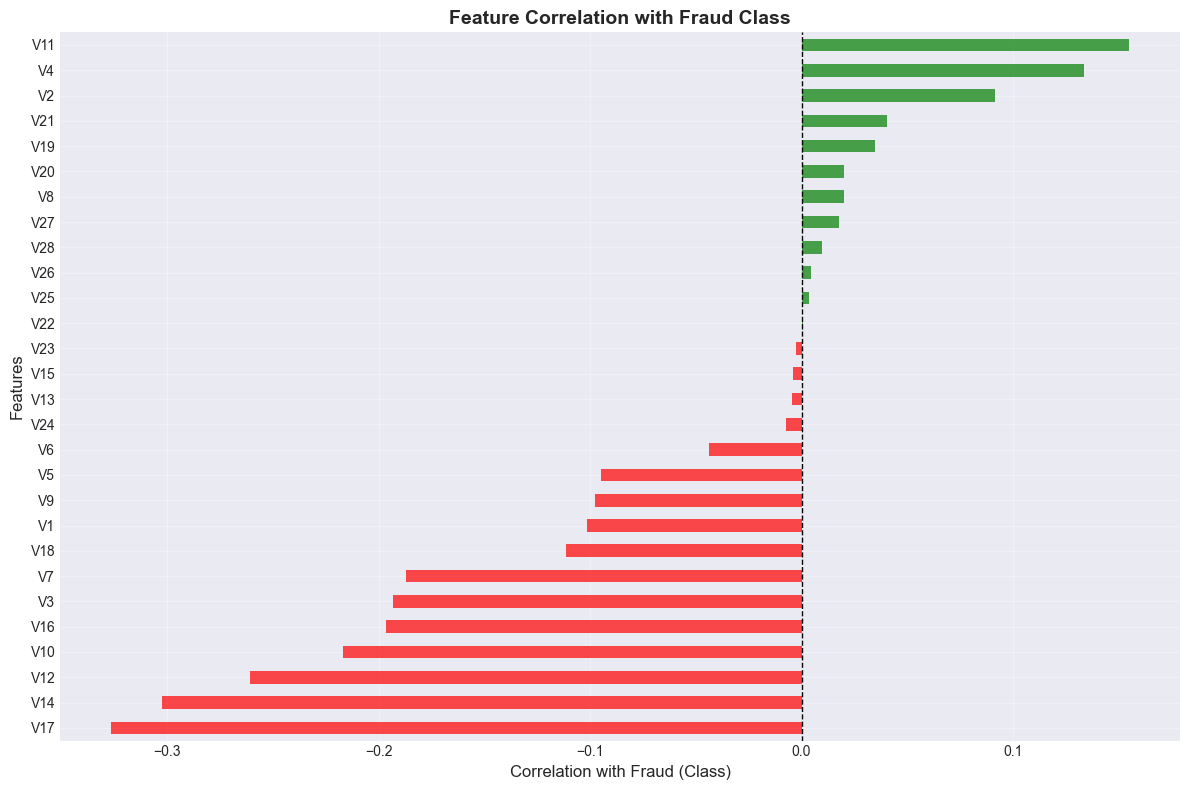


💡 Features with high absolute correlation may be most predictive


In [18]:
# Visualize feature correlations with target
fig, ax = plt.subplots(figsize=(12, 8))

correlations_sorted = correlations.sort_values()
colors = ['red' if x < 0 else 'green' for x in correlations_sorted]

correlations_sorted.plot(kind='barh', ax=ax, color=colors, alpha=0.7)
ax.set_xlabel('Correlation with Fraud (Class)', fontsize=12)
ax.set_ylabel('Features', fontsize=12)
ax.set_title('Feature Correlation with Fraud Class', fontsize=14, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='--', linewidth=1)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Features with high absolute correlation may be most predictive")

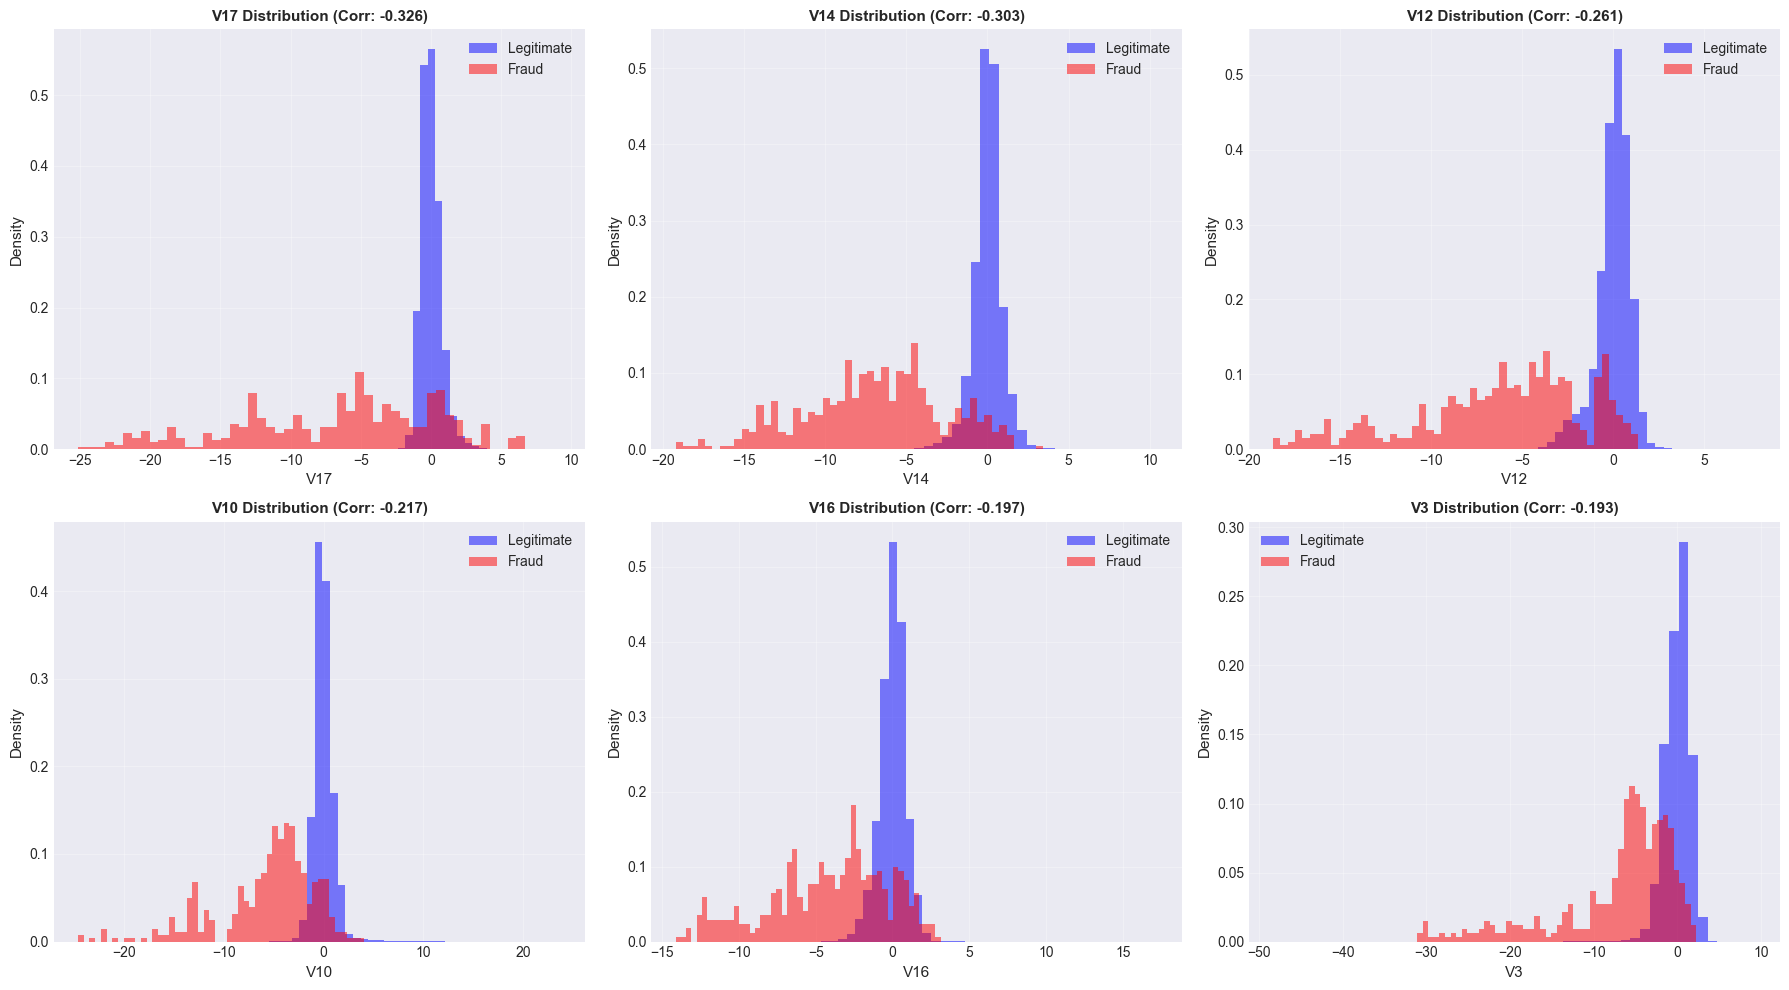

In [19]:
# Visualize distribution of top correlated features
top_features = correlations.abs().sort_values(ascending=False).head(6).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    axes[idx].hist(df[df['Class']==0][feature], bins=50, alpha=0.5, label='Legitimate', color='blue', density=True)
    axes[idx].hist(df[df['Class']==1][feature], bins=50, alpha=0.5, label='Fraud', color='red', density=True)
    axes[idx].set_xlabel(feature, fontsize=11)
    axes[idx].set_ylabel('Density', fontsize=11)
    axes[idx].set_title(f'{feature} Distribution (Corr: {correlations[feature]:.3f})', 
                        fontsize=11, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Data Leakage Detection

Check for potential data leakage issues that could artificially inflate model performance.

In [20]:
print("Data Leakage Checks:")
print("="*50)

# Check 1: Perfect separation in any feature
print("\n1. Checking for perfect separation in features...")
perfect_separation = False
for col in df.columns:
    if col != 'Class':
        fraud_vals = set(df[df['Class']==1][col].unique())
        legit_vals = set(df[df['Class']==0][col].unique())
        if fraud_vals.isdisjoint(legit_vals):
            print(f"   ⚠️  WARNING: Perfect separation in {col}")
            perfect_separation = True

if not perfect_separation:
    print("   ✓ No perfect separation detected")

# Check 2: Suspiciously high correlations
print("\n2. Checking for suspiciously high correlations...")
high_corr_threshold = 0.9
high_corr_features = correlations[correlations.abs() > high_corr_threshold]
if len(high_corr_features) > 0:
    print(f"   ⚠️  WARNING: Features with correlation > {high_corr_threshold}:")
    print(high_corr_features)
else:
    print(f"   ✓ No features with correlation > {high_corr_threshold}")

# Check 3: Time-based leakage
print("\n3. Checking for time-based leakage...")
print("   💡 Time feature represents seconds elapsed - should be safe")
print("   💡 However, be cautious about temporal patterns in deployment")

# Check 4: Feature scaling issues
print("\n4. Checking feature scales...")
print(f"   - V features (PCA): Already scaled (mean ≈ 0, std ≈ 1)")
print(f"   - Time: Range = {df['Time'].min():.0f} to {df['Time'].max():.0f}")
print(f"   - Amount: Range = {df['Amount'].min():.2f} to {df['Amount'].max():.2f}")
print(f"   ⚠️  Time and Amount need scaling before modeling!")

Data Leakage Checks:

1. Checking for perfect separation in features...
   ⚠️  WARNING: Perfect separation in V1
   ⚠️  WARNING: Perfect separation in V2
   ⚠️  WARNING: Perfect separation in V3
   ⚠️  WARNING: Perfect separation in V4
   ⚠️  WARNING: Perfect separation in V5
   ⚠️  WARNING: Perfect separation in V6
   ⚠️  WARNING: Perfect separation in V7
   ⚠️  WARNING: Perfect separation in V8
   ⚠️  WARNING: Perfect separation in V9
   ⚠️  WARNING: Perfect separation in V10
   ⚠️  WARNING: Perfect separation in V11
   ⚠️  WARNING: Perfect separation in V12
   ⚠️  WARNING: Perfect separation in V13
   ⚠️  WARNING: Perfect separation in V14
   ⚠️  WARNING: Perfect separation in V15
   ⚠️  WARNING: Perfect separation in V16
   ⚠️  WARNING: Perfect separation in V17
   ⚠️  WARNING: Perfect separation in V18
   ⚠️  WARNING: Perfect separation in V19
   ⚠️  WARNING: Perfect separation in V20
   ⚠️  WARNING: Perfect separation in V21
   ⚠️  WARNING: Perfect separation in V22
   ⚠️  WARNIN

## 7. Key Insights and Recommendations

In [21]:
# Generate summary insights
info = get_data_info(df)

print("\n" + "="*70)
print("KEY INSIGHTS & RECOMMENDATIONS")
print("="*70)

print("\n📊 CLASS IMBALANCE:")
print(f"   - Fraud rate: {info['fraud_percentage']:.4f}%")
print(f"   - Imbalance ratio: 1:{info['legitimate_count']/info['fraud_count']:.0f}")
print(f"   - Recommendation: Use SMOTE, class weights, or ensemble methods")

print("\n📈 EVALUATION METRICS:")
print(f"   - DO NOT use accuracy as primary metric")
print(f"   - Focus on: Precision, Recall, F1-Score, PR-AUC, ROC-AUC")
print(f"   - Consider business cost of False Negatives vs False Positives")

print("\n🔧 PREPROCESSING NEEDED:")
print(f"   - Scale 'Time' and 'Amount' features")
print(f"   - V features are already PCA-transformed and scaled")
print(f"   - Consider creating time-based features (hour of day, etc.)")

print("\n🎯 MODELING STRATEGY:")
print(f"   - Use stratified train-test split to maintain class ratio")
print(f"   - Apply resampling techniques (SMOTE, ADASYN)")
print(f"   - Try ensemble methods (Random Forest, XGBoost, LightGBM)")
print(f"   - Use cross-validation with stratification")

print("\n⚠️  DATA QUALITY:")
print(f"   - Missing values: {info['missing_values']} ✓")
print(f"   - Duplicate rows: {info['duplicate_rows']} ✓")
print(f"   - No obvious data leakage detected ✓")

print("\n🔍 FEATURE IMPORTANCE:")
top_3_features = correlations.abs().sort_values(ascending=False).head(3)
print(f"   Top 3 correlated features:")
for feat, corr in top_3_features.items():
    print(f"   - {feat}: {corr:.4f}")

print("\n" + "="*70)
print("✓ Data profiling complete! Ready for preprocessing and modeling.")
print("="*70)


KEY INSIGHTS & RECOMMENDATIONS

📊 CLASS IMBALANCE:
   - Fraud rate: 0.1727%
   - Imbalance ratio: 1:578
   - Recommendation: Use SMOTE, class weights, or ensemble methods

📈 EVALUATION METRICS:
   - DO NOT use accuracy as primary metric
   - Focus on: Precision, Recall, F1-Score, PR-AUC, ROC-AUC
   - Consider business cost of False Negatives vs False Positives

🔧 PREPROCESSING NEEDED:
   - Scale 'Time' and 'Amount' features
   - V features are already PCA-transformed and scaled
   - Consider creating time-based features (hour of day, etc.)

🎯 MODELING STRATEGY:
   - Use stratified train-test split to maintain class ratio
   - Apply resampling techniques (SMOTE, ADASYN)
   - Try ensemble methods (Random Forest, XGBoost, LightGBM)
   - Use cross-validation with stratification

⚠️  DATA QUALITY:
   - Missing values: 0 ✓
   - Duplicate rows: 1081 ✓
   - No obvious data leakage detected ✓

🔍 FEATURE IMPORTANCE:
   Top 3 correlated features:
   - V17: 0.3265
   - V14: 0.3025
   - V12: 0.260

## 8. Next Steps

Based on this analysis, the next steps are:

1. **Data Preprocessing** (Notebook 02):
   - Scale Time and Amount features
   - Create additional time-based features
   - Prepare train-test split with stratification

2. **Handle Class Imbalance** (Notebook 03):
   - Apply SMOTE or ADASYN
   - Experiment with class weights
   - Compare different resampling strategies

3. **Model Training** (Notebook 04):
   - Train baseline models
   - Evaluate with appropriate metrics
   - Optimize hyperparameters

4. **Model Evaluation** (Notebook 05):
   - Compare model performance
   - Analyze confusion matrices
   - Calculate business impact metrics